In [1]:
#Imports

import math
import numpy as np
from numpy import genfromtxt
from scipy import stats
from scipy.special import logit as lgTransform
from scipy.interpolate import UnivariateSpline
import pandas as pd
import statsmodels.api as sm 
import matplotlib.pylab as plt 
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
from statsmodels.formula.api import logit
%matplotlib inline

In [2]:
dfGeneLoF = pd.read_csv('synonMissenseLoFLOEUFCsvs/lossoffunctionsGenesWithCovg.csv', header=None)
LoFObservedTxt = genfromtxt('synonMissenseLoFLOEUFCsvs/lossoffunctionObservedWithCovg.csv', delimiter=',')
LoFExpectedTxt = genfromtxt('synonMissenseLoFLOEUFCsvs/lossoffunctionExpectedWithCovg.csv', delimiter=',')

print(dfGeneLoF)
print(LoFObservedTxt)
print(LoFExpectedTxt)

LoFObserved = LoFObservedTxt.tolist()
LoFExpected = LoFExpectedTxt.tolist()

dfGeneLoF = dfGeneLoF.iloc[1: , :]
dfGeneLoF.columns = ['gene_id']
print(dfGeneLoF.head())

dfGeneLoF['expected'] = LoFExpected
dfGeneLoF['observed'] = LoFObserved
print(dfGeneLoF.head())

                     0
0                    0
1      ENSG00000187634
2      ENSG00000188976
3      ENSG00000187961
4      ENSG00000187583
...                ...
14290  ENSG00000100288
14291  ENSG00000008735
14292  ENSG00000100299
14293  ENSG00000251322
14294  ENSG00000100312

[14295 rows x 1 columns]
[ 6. 17.  7. ...  2.  0.  1.]
[ 4.71716048 16.04621795  9.58691643 ...  3.83274278 10.45750332
  3.77099134]
           gene_id
1  ENSG00000187634
2  ENSG00000188976
3  ENSG00000187961
4  ENSG00000187583
5  ENSG00000188290
           gene_id   expected  observed
1  ENSG00000187634   4.717160       6.0
2  ENSG00000188976  16.046218      17.0
3  ENSG00000187961   9.586916       7.0
4  ENSG00000187583   7.369923       3.0
5  ENSG00000188290   0.971540       2.0


0.01724276916972692
593.0142465736416


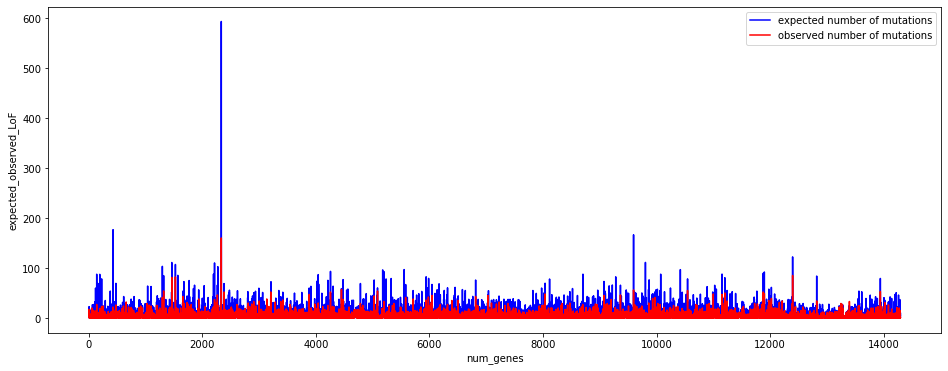

In [3]:
# plt.scatter(dfGeneSynon['gene_synonymous'], dfGeneSynon['expected'])
# plt.scatter(dfGeneSynon['gene_synonymous'], dfGeneSynon['observed'])
print(dfGeneLoF['expected'].min())
print(dfGeneLoF['expected'].max())
# plt.hist(dfGeneSynon['expected'])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
plt.plot(dfGeneLoF['expected'], c = 'b', label = "expected number of mutations")
plt.plot(dfGeneLoF['observed'], c = 'r', label = "observed number of mutations")
plt.ylabel('expected_observed_LoF')
plt.xlabel('num_genes')
plt.legend()

14294


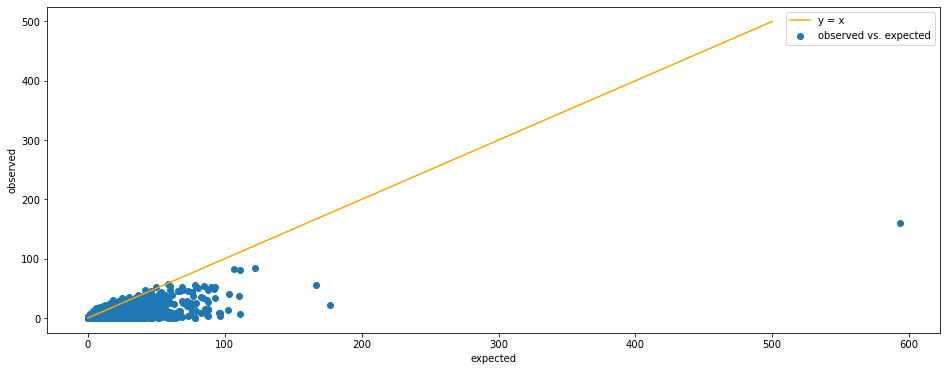

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
x_range = np.linspace(0, 500, 500)
y_range = np.linspace(0, 500, 500)
#print(len(x_range))
print(len(dfGeneLoF['expected']))
plt.scatter(dfGeneLoF['expected'], dfGeneLoF['observed'], label='observed vs. expected')
plt.plot(x_range, y_range, c = 'orange', label='y = x')
#plt.scatter(x_range, dfGeneMissense['observed'], label = "observed number of mutations")
#plt.xscale("log")
#plt.yscale("log")
plt.xlabel('expected')
plt.ylabel('observed')
plt.legend()

In [5]:
dfGeneLoF['observed/expected'] = dfGeneLoF['observed'] / dfGeneLoF['expected']
print(dfGeneLoF.head())

           gene_id   expected  observed  observed/expected
1  ENSG00000187634   4.717160       6.0           1.271952
2  ENSG00000188976  16.046218      17.0           1.059440
3  ENSG00000187961   9.586916       7.0           0.730162
4  ENSG00000187583   7.369923       3.0           0.407060
5  ENSG00000188290   0.971540       2.0           2.058588


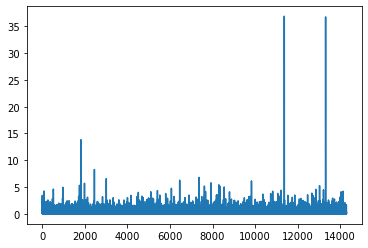

In [6]:
plt.plot(dfGeneLoF['observed/expected'])

In [7]:
dfByGene = pd.read_csv('all_lofs/gene_lofs/gnomad.v2.1.1.lof_metrics.by_gene.txt', delimiter = '\t')
print(len(dfByGene))
print(dfByGene.head())

19704
    gene       transcript  obs_mis  exp_mis   oe_mis    mu_mis  possible_mis  \
0  MED13  ENST00000397786      871  1117.80  0.77921  0.000056         14195   
1  NIPBL  ENST00000282516      846  1441.50  0.58688  0.000074         18540   
2   SMC3  ENST00000361804      178   630.07  0.28251  0.000032          8109   
3  CNOT1  ENST00000317147      561  1295.90  0.43290  0.000069         15670   
4    RLF  ENST00000372771      669   972.87  0.68766  0.000047         12682   

   obs_mis_pphen  exp_mis_pphen  oe_mis_pphen  ...       gene_type  \
0          314.0         529.75       0.59273  ...  protein_coding   
1          158.0         543.10       0.29092  ...  protein_coding   
2           21.0         182.52       0.11506  ...  protein_coding   
3           51.0         290.68       0.17545  ...  protein_coding   
4          107.0         321.14       0.33319  ...  protein_coding   

   gene_length  exac_pLI  exac_obs_lof  exac_exp_lof  exac_oe_lof  \
0       122678       1.

In [8]:
print(dfByGene.columns)

Index(['gene', 'transcript', 'obs_mis', 'exp_mis', 'oe_mis', 'mu_mis',
       'possible_mis', 'obs_mis_pphen', 'exp_mis_pphen', 'oe_mis_pphen',
       'possible_mis_pphen', 'obs_syn', 'exp_syn', 'oe_syn', 'mu_syn',
       'possible_syn', 'obs_lof', 'mu_lof', 'possible_lof', 'exp_lof', 'pLI',
       'pNull', 'pRec', 'oe_lof', 'oe_syn_lower', 'oe_syn_upper',
       'oe_mis_lower', 'oe_mis_upper', 'oe_lof_lower', 'oe_lof_upper',
       'constraint_flag', 'syn_z', 'mis_z', 'lof_z', 'oe_lof_upper_rank',
       'oe_lof_upper_bin', 'oe_lof_upper_bin_6', 'n_sites', 'classic_caf',
       'max_af', 'no_lofs', 'obs_het_lof', 'obs_hom_lof', 'defined', 'p',
       'exp_hom_lof', 'classic_caf_afr', 'classic_caf_amr', 'classic_caf_asj',
       'classic_caf_eas', 'classic_caf_fin', 'classic_caf_nfe',
       'classic_caf_oth', 'classic_caf_sas', 'p_afr', 'p_amr', 'p_asj',
       'p_eas', 'p_fin', 'p_nfe', 'p_oth', 'p_sas', 'transcript_type',
       'gene_id', 'transcript_level', 'cds_length', 'num_codi

In [9]:
dfReferenceOEMetrics = dfByGene[['gene','gene_id', 'gene_length', 'obs_lof', 'exp_lof', 'oe_lof', 'mu_lof','oe_lof_lower', 'oe_lof_upper']]
print(dfReferenceOEMetrics.head())
print(len(dfReferenceOEMetrics))

    gene          gene_id  gene_length  obs_lof  exp_lof    oe_lof    mu_lof  \
0  MED13  ENSG00000108510       122678      0.0   98.429  0.000000  0.000005   
1  NIPBL  ENSG00000164190       189655      1.0  150.320  0.006653  0.000009   
2   SMC3  ENSG00000108055        36946      0.0   79.490  0.000000  0.000005   
3  CNOT1  ENSG00000125107       109936      1.0  125.030  0.007998  0.000007   
4    RLF  ENSG00000117000        79549      0.0   73.222  0.000000  0.000004   

   oe_lof_lower  oe_lof_upper  
0         0.000         0.030  
1         0.001         0.032  
2         0.000         0.037  
3         0.002         0.038  
4         0.000         0.040  
19704


In [10]:
snv_genes = dfGeneLoF['gene_id']
print(len(snv_genes))

dfReferenceOEMetricsRefined = dfReferenceOEMetrics.loc[dfReferenceOEMetrics['gene_id'].isin(snv_genes)]

#dfReferenceOEMetricsRefined = dfReferenceOEMetrics[dfReferenceOEMetrics['gene_id'] == snv_genes].values
#print(dfReferenceOEMetricsRefined.head())
#print(len(dfReferenceOEMetricsRefined))

dfMerged = pd.merge(dfGeneLoF, dfReferenceOEMetricsRefined, on='gene_id', how='inner')
dfMerged['expected/gene_length'] = dfMerged['expected'] / dfMerged['gene_length']
print(dfMerged.head())
print(len(dfMerged))

14294
           gene_id   expected  observed  observed/expected     gene  \
0  ENSG00000187634   4.717160       6.0           1.271952   SAMD11   
1  ENSG00000188976  16.046218      17.0           1.059440    NOC2L   
2  ENSG00000187961   9.586916       7.0           0.730162   KLHL17   
3  ENSG00000187583   7.369923       3.0           0.407060  PLEKHN1   
4  ENSG00000188290   0.971540       2.0           2.058588     HES4   

   gene_length  obs_lof  exp_lof   oe_lof        mu_lof  oe_lof_lower  \
0        19696     22.0   24.538  0.89656  1.306800e-06         0.640   
1        15106     43.0   41.785  1.02910  2.153700e-06         0.805   
2         5129     26.0   28.650  0.90749  1.648800e-06         0.664   
3         9369     25.0   31.069  0.80467  1.569300e-06         0.585   
4         1211      6.0    3.530  1.69970  1.525100e-07         0.816   

   oe_lof_upper  expected/gene_length  
0         1.280              0.000239  
1         1.327              0.001062  
2       

[0.00000000e+00 9.78998902e-22 6.25968401e-20 ... 7.83350515e-02
 7.83081577e-02 7.82812684e-02]
1.2953386747790172


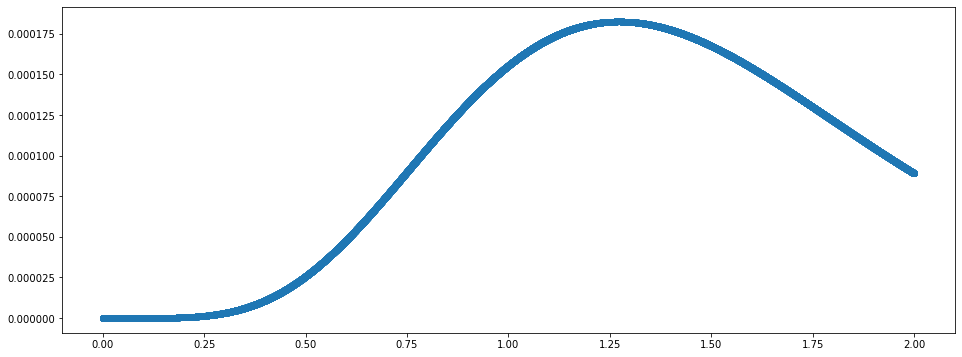

In [11]:
#Only first gene

N_points = 10000
alpha_range = np.linspace(0, 2, N_points)

posterior = stats.poisson.pmf(dfMerged['observed'][0], dfMerged['expected'][0]*alpha_range)
print(posterior)
posterior_prob = posterior/np.sum(posterior)
posterior_mean = np.sum(alpha_range*posterior_prob)
print(posterior_mean)
cdf_gene = np.cumsum(posterior_prob)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
plt.scatter(alpha_range, posterior_prob)

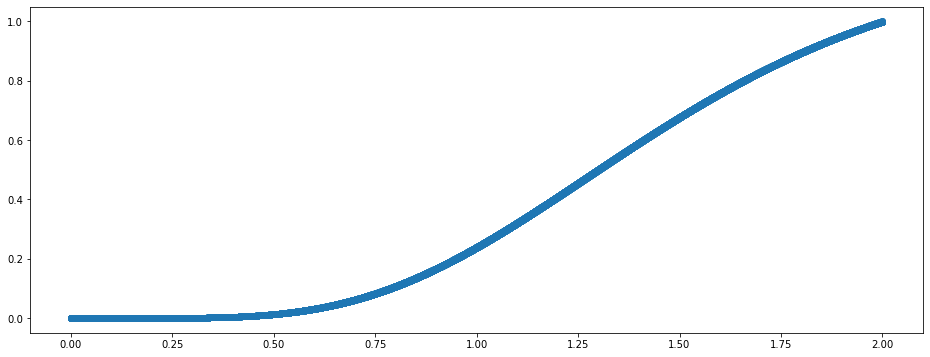

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
plt.scatter(alpha_range, cdf_gene)

0.6672667266726673
1.896989698969897


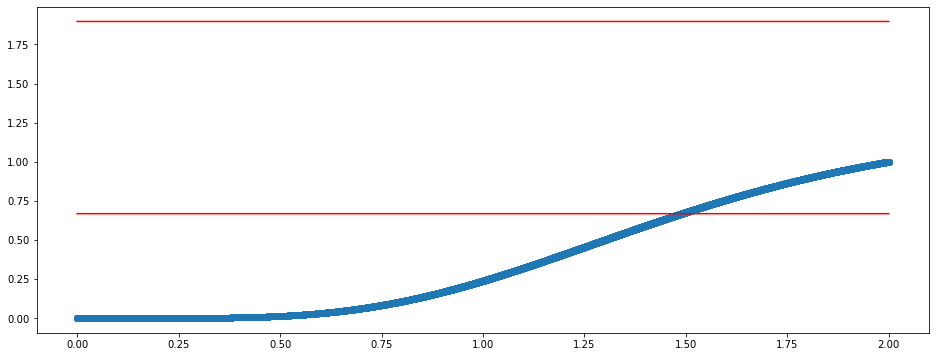

In [13]:
lowerBound = alpha_range[np.searchsorted(cdf_gene, 0.05, side="left")]
upperBound = alpha_range[np.searchsorted(cdf_gene, 0.95, side="right")]

print(lowerBound)
print(upperBound)

fifthPercentile = [lowerBound for i in range(len(alpha_range))]
ninetyFifthPercentile = [upperBound for i in range(len(alpha_range))]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
plt.scatter(alpha_range, cdf_gene)
plt.plot(alpha_range, fifthPercentile, c = 'r')
plt.plot(alpha_range, ninetyFifthPercentile, c = 'r')

# x_intercept_lower = 0
# for i in range(len(alpha_range)):
#     if (lowerBound > cdf_gene[i]):
#         x_intercept_lower = i
        
# x_intercept_upper = 0
# for i in range(len(alpha_range)):
#     if (upperBound > cdf_gene[i]):
#         x_intercept_upper = i
        
# #x_intercept_lower = cdf_gene.tolist().index(lowerBound)
# #x_intercept_upper = cdf_gene.tolist().index(upperBound)
        
# print(x_intercept_lower)
# print("Lower Bound: ", alpha_range[x_intercept_lower])

# print(x_intercept_upper)
# print("LOEUF: ", alpha_range[x_intercept_upper])

In [14]:
#Only first gene

lowerBoundArray = np.zeros(len(dfMerged))
LOEUFArray = np.zeros(len(dfMerged))
posterior_meanArray = np.zeros(len(dfMerged))

for i in range(len(dfMerged)):
    N_points = 10000
    alpha_range = np.linspace(0, 2, N_points)

    posterior = stats.poisson.pmf(dfMerged['observed'][i], dfMerged['expected'][i]*alpha_range)
    #print(posterior)
    posterior_prob = posterior/np.sum(posterior)
    posterior_mean = np.sum(alpha_range*posterior_prob)
    posterior_meanArray[i] = posterior_mean
    #print(posterior_mean)
    cdf_gene = np.cumsum(posterior_prob)
    
    lowerBound = alpha_range[np.searchsorted(cdf_gene, 0.05, side="left")]
    upperBound = alpha_range[np.searchsorted(cdf_gene, 0.95, side="right")]

    fifthPercentile = [lowerBound for i in range(len(alpha_range))]
    ninetyFifthPercentile = [upperBound for i in range(len(alpha_range))]

    x_intercept_lower = 0
    for j in range(len(alpha_range)):
        if (lowerBound > cdf_gene[j]):
            x_intercept_lower = j

    x_intercept_upper = 0
    for j in range(len(alpha_range)):
        if (upperBound > cdf_gene[j]):
            x_intercept_upper = j
            
    #x_intercept_lower = cdf_gene.tolist().index(lowerBound)
    #x_intercept_upper = cdf_gene.tolist().index(upperBound)
    
    #print(x_intercept_lower)
    #print("Lower Bound: ", alpha_range[x_intercept_lower])
    lowerBoundArray[i] = lowerBound
    
    #print(x_intercept_upper)
    #print("LOEUF: ", alpha_range[x_intercept_upper])
    LOEUFArray[i] = upperBound
    
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
# plt.scatter(alpha_range, posterior_prob)
print("Lower Bound Array: ", lowerBoundArray)
print("LOEUF Array: ", LOEUFArray)
print("Posterior_Mean Array: ", posterior_meanArray)

Lower Bound Array:  [0.66726673 0.72487249 0.4150415  ... 0.21182118 0.00480048 0.0940094 ]
LOEUF Array:  [1.8969897  1.58115812 1.36633663 ... 1.53735374 0.28642864 1.23152315]
Posterior_Mean Array:  [1.29533867 1.11911675 0.83268899 ... 0.75469353 0.09552514 0.52233067]


In [15]:
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
# plt.scatter(alpha_range, cdf_gene)
print(LOEUFArray.min())
print(LOEUFArray.max())
print(dfMerged['oe_lof_upper'].min())
print(dfMerged['oe_lof_upper'].max())

0.038203820382038206
1.984798479847985
0.03
1.995


In [16]:
dfMerged['lower_oe_bound'] = lowerBoundArray.tolist()
dfMerged['LOEUF'] = LOEUFArray.tolist()
dfMerged['posterior_distribution_mean'] = posterior_meanArray.tolist()
print(dfMerged.head())

           gene_id   expected  observed  observed/expected     gene  \
0  ENSG00000187634   4.717160       6.0           1.271952   SAMD11   
1  ENSG00000188976  16.046218      17.0           1.059440    NOC2L   
2  ENSG00000187961   9.586916       7.0           0.730162   KLHL17   
3  ENSG00000187583   7.369923       3.0           0.407060  PLEKHN1   
4  ENSG00000188290   0.971540       2.0           2.058588     HES4   

   gene_length  obs_lof  exp_lof   oe_lof        mu_lof  oe_lof_lower  \
0        19696     22.0   24.538  0.89656  1.306800e-06         0.640   
1        15106     43.0   41.785  1.02910  2.153700e-06         0.805   
2         5129     26.0   28.650  0.90749  1.648800e-06         0.664   
3         9369     25.0   31.069  0.80467  1.569300e-06         0.585   
4         1211      6.0    3.530  1.69970  1.525100e-07         0.816   

   oe_lof_upper  expected/gene_length  lower_oe_bound     LOEUF  \
0         1.280              0.000239        0.667267  1.896990   


Text(0, 0.5, 'Calculated LOEUF')

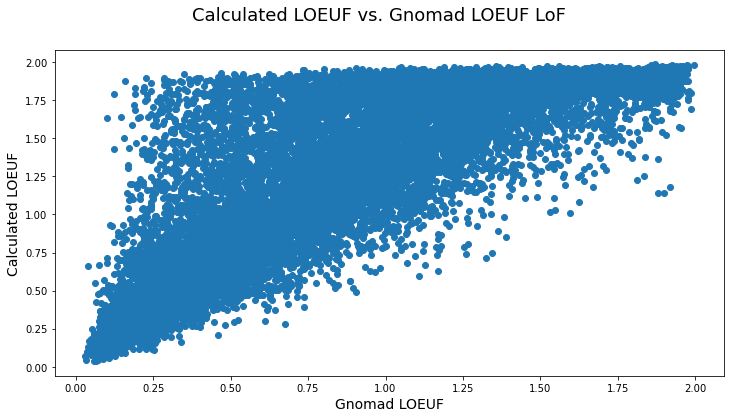

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))

plt.scatter(dfMerged['oe_lof_upper'], dfMerged['LOEUF'])
fig.suptitle('Calculated LOEUF vs. Gnomad LOEUF LoF', fontsize=18)
plt.xlabel('Gnomad LOEUF', fontsize = 14)
plt.ylabel('Calculated LOEUF', fontsize = 14)

36.74128058573315


Text(0, 0.5, 'Observed/Expected')

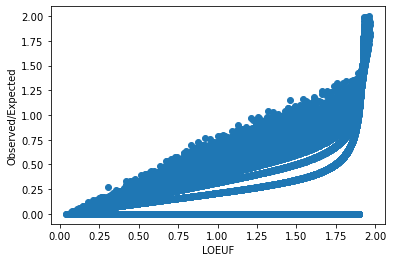

In [18]:
print(dfMerged['observed/expected'].max())
dfMergedNoOutlier = dfMerged[dfMerged['observed/expected'] <= 2.0]
plt.scatter(dfMergedNoOutlier['LOEUF'], dfMergedNoOutlier['observed/expected'])
plt.xlabel('LOEUF')
plt.ylabel('Observed/Expected')

Text(0, 0.5, 'Frequency')

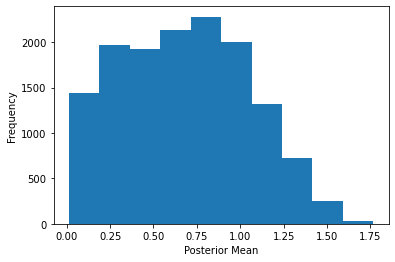

In [19]:
plt.hist(dfMerged['posterior_distribution_mean'])

plt.xlabel('Posterior Mean')
plt.ylabel('Frequency')

160.0


Text(0, 0.5, 'LOEUF')

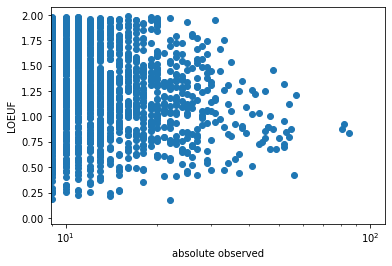

In [20]:
print(dfMerged['observed'].max())
dfMergedNoOutlier1 = dfMerged[dfMerged['observed'] <= 100]
plt.scatter(dfMergedNoOutlier1['observed'], dfMergedNoOutlier1['LOEUF'])
plt.xscale("log")
#plt.yscale("log")
plt.xlabel('absolute observed')
plt.ylabel('LOEUF')

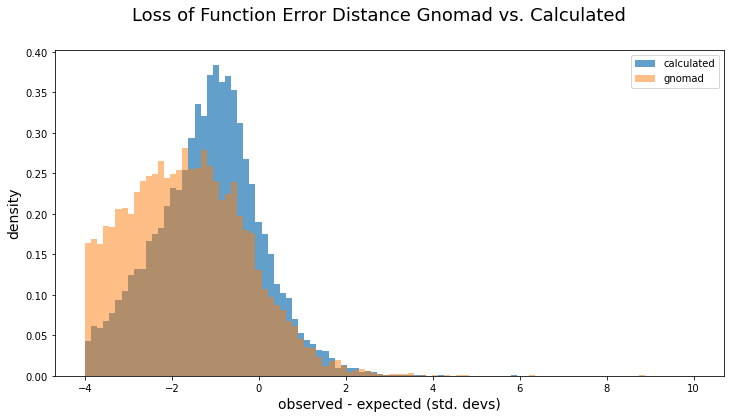

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))

plt.hist((dfMerged.observed - dfMerged.expected)/np.sqrt(dfMerged.expected), label='calculated', range=[-4, 10], bins = 100, alpha=0.7, density=True)
plt.hist((dfMerged.obs_lof - dfMerged.exp_lof)/np.sqrt(dfMerged.exp_lof), label='gnomad', range=[-4, 10], bins = 100, alpha=0.5, density=True)
fig.suptitle('Loss of Function Error Distance Gnomad vs. Calculated', fontsize=18)
plt.xlabel("observed - expected (std. devs)", fontsize = 14)
plt.ylabel("density", fontsize = 14)
plt.legend()

In [29]:
dfLOF = dfMerged 
print(dfLOF.columns)
dfLOF.columns = [['gene_id', 'expected_LoF', 'observed_LoF', 'observed/expected_LoF', 'gene_LoF',
       'gene_length', 'obs_lof', 'exp_lof', 'oe_lof', 'mu_lof', 'oe_lof_lower',
       'oe_lof_upper', 'expected/gene_length', 'lower_oe_bound', 'LOEUF_LoF',
       'posterior_distribution_mean_LoF']]
print(dfLOF.head())
print(len(dfLOF))

MultiIndex([(                        'gene_id',),
            (                   'expected_LoF',),
            (                   'observed_LoF',),
            (          'observed/expected_LoF',),
            (                       'gene_LoF',),
            (                    'gene_length',),
            (                        'obs_lof',),
            (                        'exp_lof',),
            (                         'oe_lof',),
            (                         'mu_lof',),
            (                   'oe_lof_lower',),
            (                   'oe_lof_upper',),
            (           'expected/gene_length',),
            (                 'lower_oe_bound',),
            (                      'LOEUF_LoF',),
            ('posterior_distribution_mean_LoF',)],
           )
           gene_id expected_LoF observed_LoF observed/expected_LoF gene_LoF  \
0  ENSG00000187634     4.717160          6.0              1.271952   SAMD11   
1  ENSG00000188976    16.046

In [28]:
dfLOF.to_csv('lofWithCovgMetrics.csv', index=False)

(0.0, 300.0)

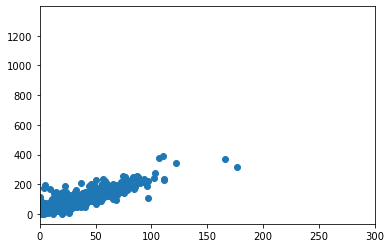

In [24]:
plt.scatter(dfMerged['expected'], dfMerged['exp_lof'])
plt.xlim(0,300)

In [25]:
print(dfMerged.head())

           gene_id   expected  observed  observed/expected     gene  \
0  ENSG00000187634   4.717160       6.0           1.271952   SAMD11   
1  ENSG00000188976  16.046218      17.0           1.059440    NOC2L   
2  ENSG00000187961   9.586916       7.0           0.730162   KLHL17   
3  ENSG00000187583   7.369923       3.0           0.407060  PLEKHN1   
4  ENSG00000188290   0.971540       2.0           2.058588     HES4   

   gene_length  obs_lof  exp_lof   oe_lof        mu_lof  oe_lof_lower  \
0        19696     22.0   24.538  0.89656  1.306800e-06         0.640   
1        15106     43.0   41.785  1.02910  2.153700e-06         0.805   
2         5129     26.0   28.650  0.90749  1.648800e-06         0.664   
3         9369     25.0   31.069  0.80467  1.569300e-06         0.585   
4         1211      6.0    3.530  1.69970  1.525100e-07         0.816   

   oe_lof_upper  expected/gene_length  lower_oe_bound     LOEUF  \
0         1.280              0.000239        0.667267  1.896990   


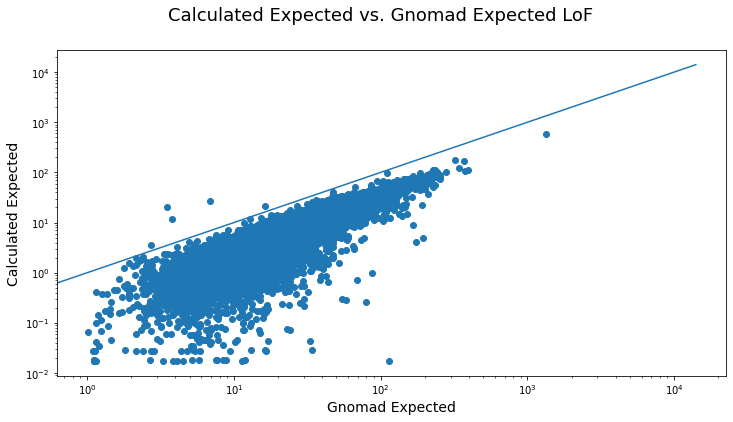

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))

plt.scatter(dfMerged['exp_lof'], dfMerged['expected'])
fig.suptitle('Calculated Expected vs. Gnomad Expected LoF', fontsize=18)
plt.xlabel('Gnomad Expected', fontsize = 14)
plt.ylabel('Calculated Expected', fontsize = 14)

x_range = np.linspace(0, len(dfMerged), len(dfMerged))
y_range = np.linspace(0, len(dfMerged), len(dfMerged))
plt.xscale("log")
plt.yscale("log")
plt.plot(x_range, y_range, label='help')
#plt.hlines(0.25, 0.1, 10000)

In [ ]:
#dfLOF.to_csv('lofMetrics.csv', index=False)